## K Nearest Neighbour Classifier

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000, # 1000 observations 
    n_features=3, # 3 total features
    n_redundant=1,
    n_classes=2, # binary target/label 
    random_state=999 
)

In [3]:
X[:5]

array([[-0.33504974,  0.02852654,  1.16193084],
       [-1.37746253, -0.4058213 ,  0.44359618],
       [-1.04520026, -0.72334759, -3.10470423],
       [ 2.08539859,  0.75814884,  0.51931764],
       [ 1.76241944,  0.82255362,  1.94511684]])

In [5]:
y[:5]

array([0, 0, 1, 1, 1])

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5,
                           algorithm='auto')

# Fit the classifier to the data
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       169
           1       0.93      0.88      0.90       161

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



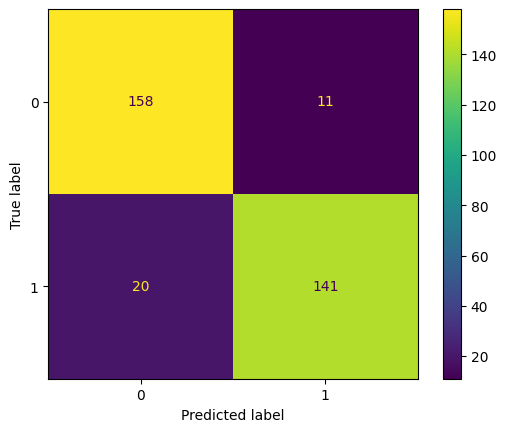

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, ConfusionMatrixDisplay

# Calculate the accuracy of the model
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

# Print classification report
print(classification_report(y_true=y_test, y_pred=y_pred))

# Create confusion matrix with ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot();


In [12]:
from sklearn.model_selection import GridSearchCV

# Create a dictionary for parameter 'n_neighbors' with a range from 1 to 10
param_grid = {'n_neighbors': np.arange(1, 10)}

# Create a GridSearchCV object
knn_cv = GridSearchCV(estimator=knn, 
                      param_grid=param_grid, 
                      cv=5)

# Fit the data to the GridSearchCV object
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [13]:
# Print the best parameter, best score, and best estimator
print('Best Parameter:', knn_cv.best_params_)
print('Best Score:', knn_cv.best_score_)
print('Best Estimator:', knn_cv.best_estimator_)

Best Parameter: {'n_neighbors': np.int64(9)}
Best Score: 0.9029850746268657
Best Estimator: KNeighborsClassifier(n_neighbors=np.int64(9))


Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       169
           1       0.92      0.90      0.91       161

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



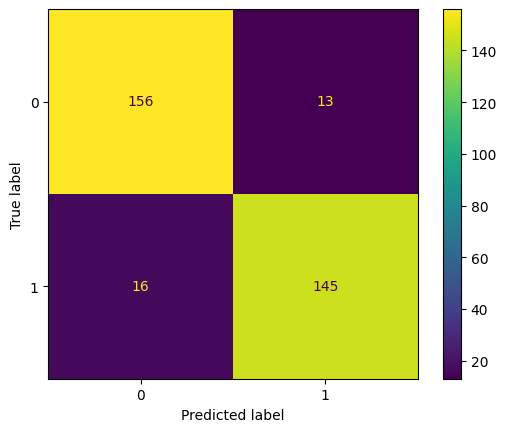

In [14]:
# Make predictions
y_pred_cv = knn_cv.best_estimator_.predict(X_test)

# Calculate the accuracy of the model
accuracy_cv = accuracy_score(y_true=y_test, y_pred=y_pred_cv)
print('Accuracy: {:.2f}'.format(accuracy_cv))

# Print classification report
print(classification_report(y_true=y_test, y_pred=y_pred_cv))

# Create confusion matrix with ConfusionMatrixDisplay
cm_cv = confusion_matrix(y_true=y_test, y_pred=y_pred_cv)
disp_cv = ConfusionMatrixDisplay(confusion_matrix=cm_cv, display_labels=knn_cv.best_estimator_.classes_)
disp_cv.plot();